In [ ]:
from numpy import mean, std
from math import floor
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
# from keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D,Activation,Flatten,Dropout,Dense,Conv2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets.mnist import load_data

from numpy.random import randint
import pandas as pd




from numpy import cov , iscomplexobj , trace
from numpy.random import random
from scipy.linalg import sqrtm

import random

In [ ]:
random.seed(12)
(train_images, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
# print(trainY.shape)
# print(testY.shape)

print(train_images.min(), train_images.max())

train_images = train_images.reshape(-1, 28, 28, 1).astype('float32')
#normalizing values in [-1, 1]
train_images = (train_images - 127.5) / 127.5 


(60000, 28, 28)
0 255


In [ ]:
def reshape_data(imageX, label):
  images = imageX.reshape(-1, 28, 28, 1).astype('float32')
  #normalizing values in [-1, 1]
  images = (imageX - 127.5) / 127.5  
  y = to_categorical(label)

  # plt.imshow(images[19,:,:,0])
  return images, y


train_images, trainY = reshape_data(train_images, trainY)
testX ,testY= reshape_data(testX,testY)
print(train_images.shape, testX.shape, testY.shape )

# fig = plt.figure(figsize=(6, 6))
# for i in range(25):
#   plt.subplot(5, 5, i+1)
#   plt.imshow(train_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
#   plt.axis('off')

(60000, 28, 28, 1) (10000, 28, 28) (10000, 10)


(10000, 784)
The new shape of file is :  (10000, 28, 28, 1)


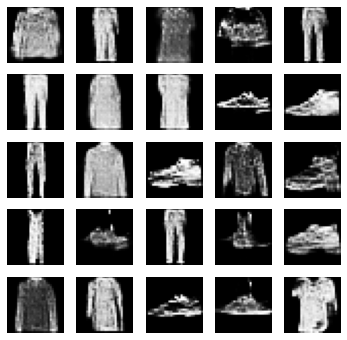

In [ ]:
def load_fake_images():
  df = pd.read_csv('GAN_images_10EPS.csv', sep = ',', header = None)
  df= np.array(df)
  print(df.shape)
  fake_imgs =  np.reshape(df, (-1,28,28,1))
  # fake_imgs= fake_imgs * 127.5 + 127.5
  # print(df.max(), df.min(), sep=' ')
  # plt.imshow(df[4,:,:,0])
  print("The new shape of file is : ", fake_imgs.shape)

  fig = plt.figure(figsize=(6, 6))
  for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(fake_imgs[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  return fake_imgs

imges= load_fake_images()

In [ ]:
real_i =train_images[0:10000,:]
test_10 = testX[0:10000,:]
print(real_i.shape)

fake_i= imges [0:10000 ,:]
print(fake_i.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


# Frechet Inception Distance

In [ ]:
def FIDs_distance(real , fake):
    
    model = load_model('FID_classifier.h5')
    model.pop()
    model.pop()
    model.pop()
    # model.pop()

    # model.summary()
    
    real = model.predict(real)
    fake = model.predict(fake)
    
    # Computing mean
    mean1 = np.mean(real , axis = 0)
    mean2 = np.mean(fake , axis = 0)
    
    # computing variance
    
    var1 = np.cov(real, rowvar = False) # rowvar = false , we need to take the variance along the column 
    var2 = np.cov(fake, rowvar = False)
#     computing difference of mean 

    mean_sq = np.sum((mean1- mean2)**2.0)
    meanvar = sqrtm(np.dot(var1 , var2))
    
    if np.iscomplexobj(meanvar):
        meanvar = meanvar.real
        
    FIDs = mean_sq + trace(var1 + var2 - 2.0 * meanvar)
    
    return FIDs
    

In [ ]:
# fid between images1 and images1
fid_score = FIDs_distance(real_i, fake_i)
print("------------------------------------------------------------ ")
print("Ferchet Inception Distance Between Real and Generated Images")
print("------------------------------------------------------------\n")

print("-------------------")
print('FIDs =  %.5f' % fid_score)
print("-------------------\n")


fid_score = FIDs_distance(real_i, real_i)
print("------------------------------------------------------------ ")
print("Ferchet Inception Distance Between Real ")
print("------------------------------------------------------------\n")

print("-------------------")
print('FIDs =  %.5f' % fid_score)
print("-------------------\n")


# print("\n Calculated FIDs on each Split")
# print(fid_score)

------------------------------------------------------------ 
Ferchet Inception Distance Between Real and Generated Images
------------------------------------------------------------

-------------------
FIDs =  46.13739
-------------------

------------------------------------------------------------ 
Ferchet Inception Distance Between Real and Generated Images
------------------------------------------------------------

-------------------
FIDs =  -0.00000
-------------------



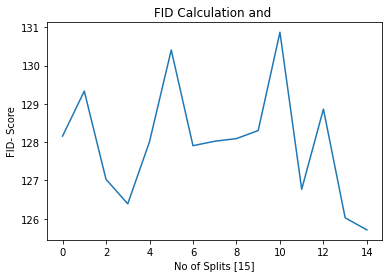

In [ ]:
# def plot_is(score):
#     plt.plot(score)
#     plt.xlabel(f'No of Splits [{n_split}]')
#     plt.ylabel('FID- Score')
#     plt.title('FID Calculation and ')
#     plt.show()
# plot_is(fid_score)

# Inception Score

In [ ]:
def IS_score (images):
    model = load_model('FID_classifier.h5')
    pyx = model.predict(images)
    # print(p_yx.shape)
    # calculate p(y)
    py = np.expand_dims(pyx.mean(axis=0), 0)
    # calculate KL divergence using log probabilities
    kLdiv = pyx * (np.log(pyx) - np.log(py))
    # sum over classes
    kLdiv_sum = kLdiv.sum(axis=1)
    # average over images
    AvgKL = mean(kLdiv_sum)
    # undo the log
    is_score = np.exp(AvgKL)
    # print(is_score)
    # store
    # scores.append(is_score)
    is_score = np.array(is_score)
    # print(is_score)

    return is_score




print("------------------------------")
print("Score on Real Image")
print("------------------------------")

RIS_score  = IS_score(real_i)
print(RIS_score)


print("\n------------------------------")
print("Score on Fafke Image")
print("------------------------------")
FIS_score = IS_score(fake_i)
print(FIS_score)


------------------------------
Score on Real Image
------------------------------
9.3368635

------------------------------
Score on Fafke Image
------------------------------
5.846959


In [ ]:
# def plot_is(score):
#     plt.plot(score)
#     plt.xlabel('No of Splits')
#     plt.ylabel('IS- Score')
#     plt.title('Inspection performance on Mutiple splits of data')
#     plt.show()
# plot_is(is_score_real)

In [ ]:
# plot_is(is_score_fake)